In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
start = time.time()
data = pd.read_csv("kakaostock.csv")
data

,0,1
0,487000,-16
1,487000,-16
2,487000,-16
3,487000,-107
4,487000,-107
5,487000,-6
6,487000,-6
7,487000,-2
8,487000,-2
9,487000,-6


In [3]:
v = 125
n = 1000
vpin=[]
vol_bucket=[]
price=[] 

volsum=0
order=0
price_bucket=0
sellsum=0
buysum=0
a=0

pin=0
pin_sum=0
price_sum=0

init = len(data["0"]-1)

while (a<init):
    order = data["1"][a]
    volsum+=abs(order)
    
    if(order<0):
        sellsum+=volsum
        volsum=0
    if(order>0):
        buysum+=volsum
        volsum=0
    
    while(sellsum+buysum>=v):
        #price_sum=abs(data["0"][a])
        if(order<0): # 매도
            sell=v-buysum
            pin=abs(sell-buysum)
            vol_bucket.append([sell,buysum,pin])
            sellsum=sellsum-sell
            buysum=0
            sell=0
            if(len(vol_bucket)==n):
                for i in range(len(vol_bucket)):
                    pin_sum+=vol_bucket[i][1]
                    #price_bucket+=vol_bucket[i][3]
                price.append(abs(data["0"][a]))
                vpin.append(pin_sum/(n*v)*100)
                pin_sum=0
                #price_bucket=0
                del vol_bucket[0]
        else: # 매수
            buy=v-sellsum
            pin=abs(sellsum-buy)
            vol_bucket.append([sellsum,buy,pin])
            buysum=buysum-buy
            sellsum=0
            buy=0
            if(len(vol_bucket)==n):
                for i in range(len(vol_bucket)):
                    pin_sum+=vol_bucket[i][1]
                    #price_bucket+=vol_bucket[i][3]
                price.append(abs(data["0"][a]))
                vpin.append(pin_sum/(n*v)*100)
                pin_sum=0
                #price_bucket=0
                del vol_bucket[0]
    a=a+1
print(time.time()-start)

1.5040779113769531


In [4]:
list=[]
for i in range(len(vpin)):
    list.append(i)

In [5]:
vp=pd.DataFrame(vpin, columns=["vpin"])
vp["price"]=price

In [6]:
vpin_gra=[]
price_gra=[]
list_gra=[]
for i in range(len(vpin)-1):
    vpin_gra.append(vpin[i+1]-vpin[i])
    price_gra.append(abs(price[i+1]-price[i]))
for i in range(len(vpin)-1):
    list_gra.append(i)

In [7]:
#500개 vpin 선형회귀 계산, 기울기+, vpin60이상 

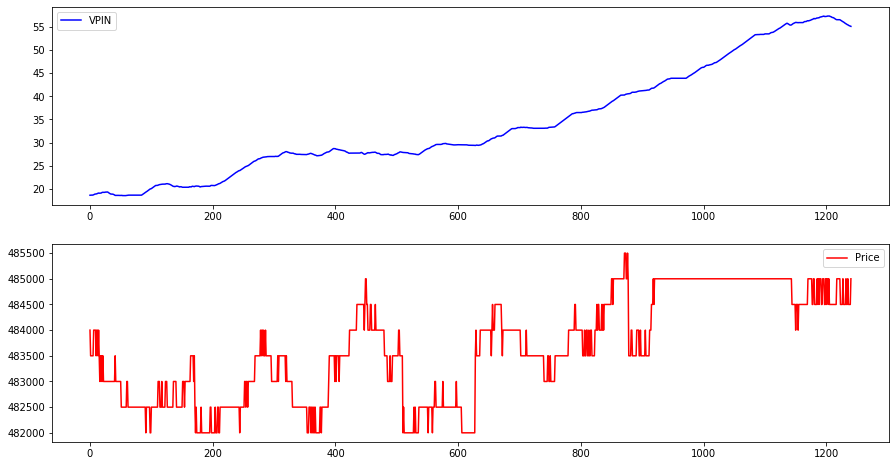

In [8]:
x=list
y=vpin
z=price
plt.figure(figsize = (15,8))
plt.subplot(2,1,1)
plt.plot(x,y, color='blue',label='VPIN')
plt.legend()
plt.subplot(2,1,2)
plt.plot(x,z, color='red', label='Price')
plt.legend()
plt.show()
plt.close()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(vpin, price, test_size=0.2, random_state=9)

In [10]:
linear_model = LinearRegression()

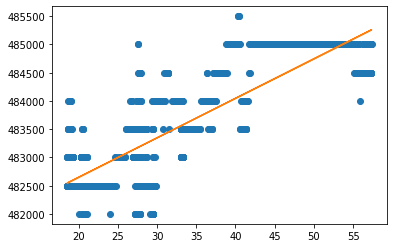

In [11]:
costlist=np.array([X_train, y_train]).T
costdata=pd.DataFrame(costlist, columns=["vpin", "price"])
linear_model.fit(costdata[['vpin']], costdata['price'])
X = costdata['vpin']
y = costdata['price'] 
plt.plot(X, y, 'o')
plt.plot(X, linear_model.predict(X.values.reshape(-1, 1)))
plt.show()

In [12]:
X_test=np.array(X_test).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)

In [13]:
pre=linear_model.predict(X_test)

In [14]:
linear_model.score(X_test, y_test)

0.6481753584050446

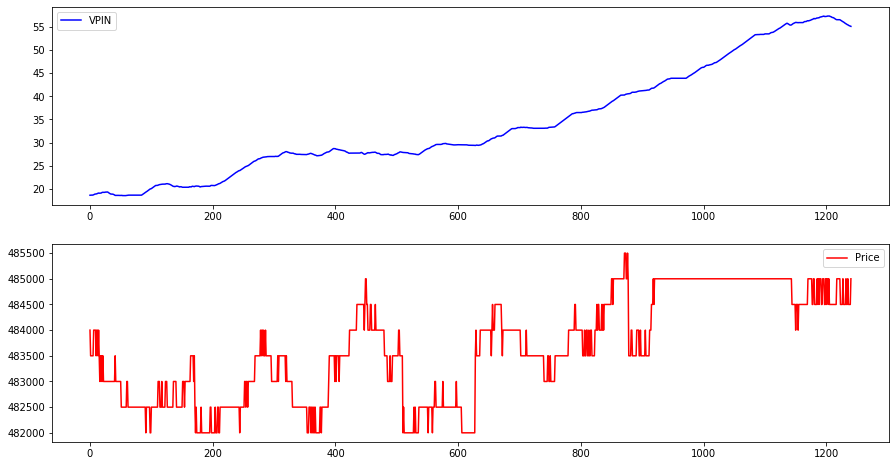

In [15]:
x=list
y=vpin
z=price
plt.figure(figsize = (15,8))
plt.subplot(2,1,1)
plt.plot(x,y, color='blue',label='VPIN')
plt.legend()
plt.subplot(2,1,2)
plt.plot(x,z, color='red', label='Price')
plt.legend()
plt.show()
plt.close()

In [16]:
max(vpin)

57.355199999999996

In [17]:
 min(vpin)

18.5296

In [18]:
#del vpin[0]
#del list[0]
del price[0]

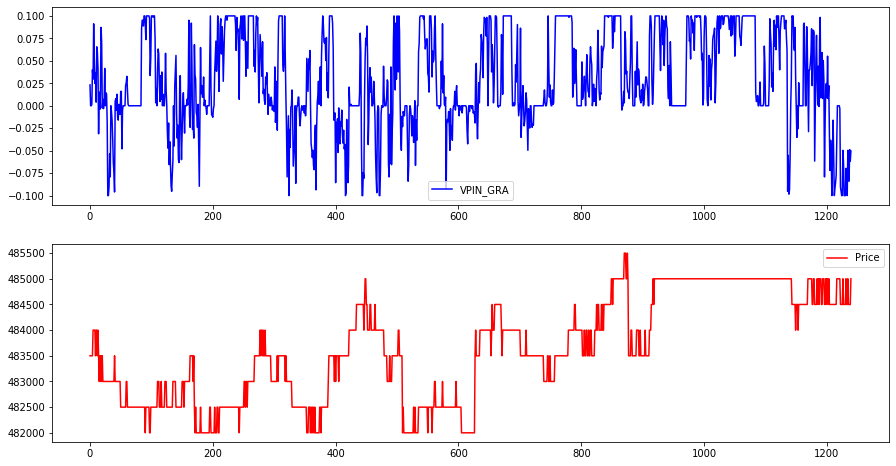

In [19]:
x=list_gra
y=vpin_gra
z=price
plt.figure(figsize = (15,8))
plt.subplot(2,1,1)
plt.plot(x,y, color='blue',label='VPIN_GRA')
plt.legend()
plt.subplot(2,1,2)
plt.plot(x,z, color='red', label='Price')
plt.legend()
plt.show()
plt.close()